In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [20]:
def Poisson(T, n, lam):
    t, P = 0.0, 0.0
    h = float(T/n)
    for i in range(1, n+1):
        yield t, P
        t = i * h
        P += np.random.poisson(lam * h)

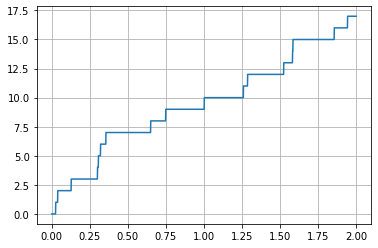

In [21]:
t, P = zip(*Poisson(2, 3000, 10.0))
pylab.plot(t, P)
pylab.grid(True)
pylab.show()

$ Y(t)=P_t-\lambda t $

In [29]:
def Y(T, n, lam):
    t, P = zip(*Poisson(T, n, lam))
    for i in range(n):
        Y = P[i] - lam * t[i]
        yield t[i], Y, P[i]

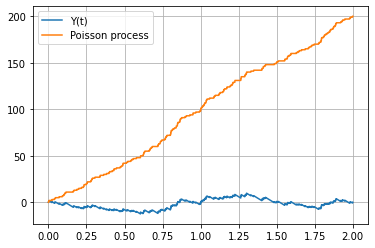

In [33]:
t, Y_, P_ = zip(*Y(2, 30000, 100.0))
pylab.plot(t, Y_, label = 'Y(t)')
pylab.plot(t, P_, label = 'Poisson process')
plt.legend()
pylab.grid(True)
pylab.show()

$ Z(t)= \frac{P_t - \lambda t}{\sqrt( \lambda \cdot t)} $

In [34]:
def Z(T, n, lam):
    t, P = zip(*Poisson(T, n, lam))
    for i in range(1, n):
        Z = (P[i] - lam * t[i]) / np.sqrt(lam * t[i])
        yield t[i], Z

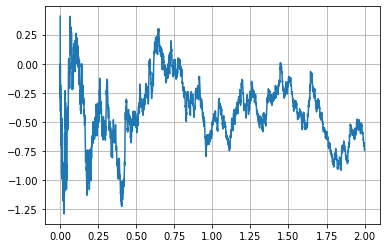

In [48]:
t, Z_ = zip(*Z(2, 3000, 1000.0))
pylab.plot(t, Z_)
pylab.grid(True)
pylab.show()

$ \sum_{i=1}^{P_t} X_t $

$X_t$ - independent and identically distributed random variables

In [45]:
def Compound_Poisson(T, n, lam):
    t, P = zip(*Poisson(T, n, lam))
    X = np.random.normal(0, 3, int(P[-1])) #normal distribution
    for i in range(1, n):
        C = 0.0
        for k in range(0, int(P[i])):
            C += X[k]
        yield t[i], C

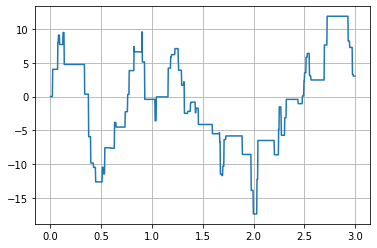

In [46]:
t, C = zip(*Compound_Poisson(3, 1000, 25))
pylab.plot(t, C)
pylab.grid(True)
pylab.show()